In [29]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

<h3> Loading of data. Preprocessed symptoms file </h3>

In [12]:
cwd = os.getcwd()
print(f"Current working directory : {cwd}")
symptoms = pd.read_csv("data/symptoms-batch5.csv-fix.csv")
symptoms.head()
symptom_list = []
for index, record in symptoms.iterrows():
    # print(record['SYMPTOMS'])
    symptom_list.append(str(record['SYMPTOMS']).split("|"))
    
symptoms.head(20)

Current working directory : /Users/vijaymi/Studies/CS-598-DL4Health/Project/135-Disease-Inference-Method


,INDEX,ROW_ID,SUBJECT_ID,HADM_ID,SYMPTOMS
0,61,208,5239,125055.0,Autoimmune hemolytic anemia|Dyspnea|Congestive...
1,62,209,5239,125055.0,Hydrocephalus Normal Pressure|Congestive hear...
2,63,210,21449,139542.0,Acute Chest Syndrome|Hypertensive disease|Hype...
3,64,211,40273,124821.0,Obesity|Chronic Kidney Diseases|Hypertensive d...
4,65,212,76874,113329.0,Benign Rolandic Epilepsy|Sleeplessness|Familia...
5,66,213,4850,175619.0,Pain|Benign Prostatic Hyperplasia|Disease|Hype...
6,67,214,13723,193691.0,Dizziness|Vertigo|Degenerative polyarthritis|D...
7,68,215,11018,104650.0,Chronic Obstructive Airway Disease|Dyspnea|Hyp...
8,69,216,11018,186291.0,Nausea|Abdominal Pain|Constipation|Vomiting|Hy...
9,10,184,28063,121936.0,Chest Pain|Aortic Valve Stenosis|Diabetes Mell...


<h3> Working with ICD Diagnosis code </h3>

In [32]:
diagnosis = pd.read_csv("data/DIAGNOSES_ICD.csv")
diagnosis.head()
diagnosis['ICD9_3CHAR'] = diagnosis['ICD9_CODE'].str[:3]
# top_diag = diagnosis.groupby(['ICD9_3CHAR'])['ICD9_3CHAR'].count().sort_values(ascending=False)
# top_50_diagnoses = top_diagnoses[:50]
# top_50_diagnoses.head()
# top_50_filtered = diagnosis[diagnosis.ICD9_3CHAR.isin(top_50_diagnoses.index)]

# top_50_filtered.shape
diagnosis = diagnosis.drop(["ICD9_CODE", "SEQ_NUM", "ROW_ID"], axis=1)
diagnosis = diagnosis.drop_duplicates()

In [35]:
top_diag = diagnosis.groupby(['ICD9_3CHAR'])['ICD9_3CHAR'].count().sort_values(ascending=False)
top_diag

ICD9_3CHAR
401    21305
427    17226
276    15101
272    14558
414    14410
       ...  
231        1
657        1
V28        1
045        1
V91        1
Name: ICD9_3CHAR, Length: 942, dtype: int64

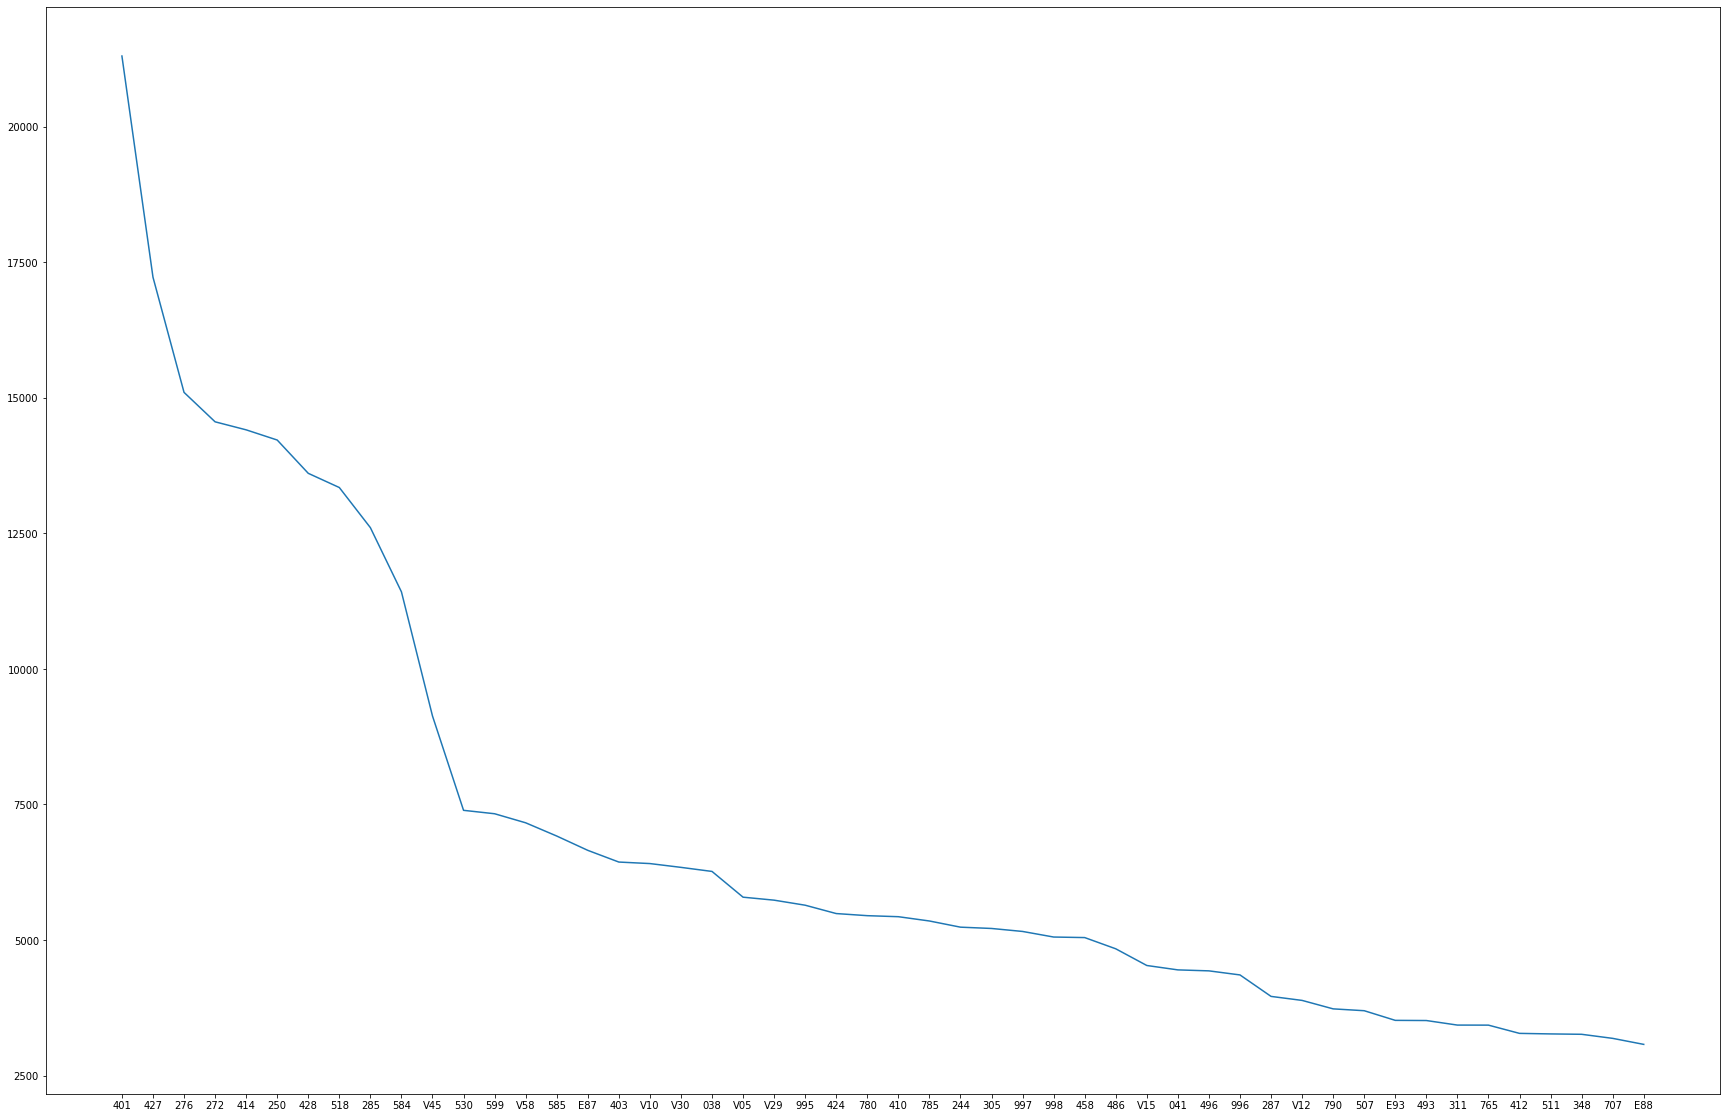

In [42]:
plt.figure(figsize=(30,20))
plt.plot(top_diag.index[:50], top_diag[:50])

In [14]:
diagnosis[diagnosis['HADM_ID'] == 193292]

,SUBJECT_ID,HADM_ID,ICD9_3CHAR
210073,19246,193292,578
210074,19246,193292,428
210076,19246,193292,427
210077,19246,193292,112
210078,19246,193292,285
210079,19246,193292,397
210080,19246,193292,414
210081,19246,193292,V45
210082,19246,193292,V43
210083,19246,193292,730


In [15]:
diagnosis_dict = pd.read_csv("data/D_ICD_DIAGNOSES.csv")
diagnosis_dict[diagnosis_dict["ICD9_CODE"] == '5789']

,ROW_ID,ICD9_CODE,SHORT_TITLE,LONG_TITLE
5866,5868,5789,Gastrointest hemorr NOS,"Hemorrhage of gastrointestinal tract, unspecified"


<h3> Extract Disease list for each Discharge Summary</h3>

In [16]:
symp_diagnoses = symptoms.set_index('HADM_ID').join(diagnosis.set_index('HADM_ID'), lsuffix='_symp', rsuffix='_diag')
symp_diagnoses = symp_diagnoses.reset_index()
symp_diagnoses_sub = symp_diagnoses[['HADM_ID', 'SYMPTOMS', 'ICD9_3CHAR']]
symp_diagnoses_sub = symp_diagnoses_sub.drop_duplicates()
print(f"symp_diagnoses.shape : {symp_diagnoses.shape}")
print(f"symp_diagnoses_sub.shape : {symp_diagnoses_sub.shape}")

# Create a column with first 3 character of ICD9 code
symp_diagnoses_sub.head()
diseases_count = symp_diagnoses_sub.groupby(['ICD9_3CHAR'])['ICD9_3CHAR'].count()
diseases_count.shape
symp_diagnoses_sub.head()

symp_diagnoses.shape : (496757, 7)
symp_diagnoses_sub.shape : (495383, 3)


,HADM_ID,SYMPTOMS,ICD9_3CHAR
0,100003.0,Cirrhosis|Liver Cirrhosis|Back Pain|Ascites|Er...,531
1,100003.0,Cirrhosis|Liver Cirrhosis|Back Pain|Ascites|Er...,285
2,100003.0,Cirrhosis|Liver Cirrhosis|Back Pain|Ascites|Er...,070
3,100003.0,Cirrhosis|Liver Cirrhosis|Back Pain|Ascites|Er...,571
4,100003.0,Cirrhosis|Liver Cirrhosis|Back Pain|Ascites|Er...,456


100019

In [17]:
N = 50
top_diagnoses = symp_diagnoses_sub.groupby(['ICD9_3CHAR'])['ICD9_3CHAR'].count().sort_values(ascending=False)
# taking only top N (50) diseases
top_N_diagnoses = top_diagnoses[:N]
print(f"top_50_diagnoses.shape : {top_N_diagnoses.shape}")
top_N_diagnoses.index

top_50_diagnoses.shape : (50,)


Index(['401', '427', '276', '414', '272', '250', '428', '518', '285', '584',
       'V45', '599', '530', 'V58', '585', 'E87', '038', 'V10', '403', '410',
       '424', '997', '995', '780', '998', '785', '244', '305', '458', '486',
       '996', '496', '041', 'V15', '287', '507', '765', '790', 'V12', 'E93',
       '511', '493', '774', '311', '412', '707', 'V29', '348', '571', 'V30'],
      dtype='object', name='ICD9_3CHAR')

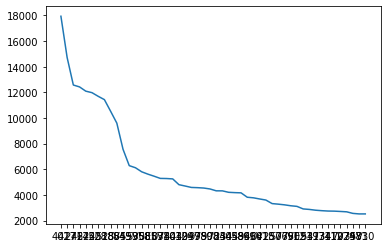

In [30]:
plt.plot(top_N_diagnoses.index, top_N_diagnoses)

<h3> Construct Diagnosis x Symptom matrix </h3>
Number of diseases are 50. Number of symptoms we don't know yet that will get associated with these 50 diseases

In [18]:
print(f"symp_diagnoses.shape : {symp_diagnoses_sub.shape}")
top_N_filtered = symp_diagnoses_sub[symp_diagnoses_sub.ICD9_3CHAR.isin(top_N_diagnoses.index)]
print(f"top_N_filtered.shape : {top_N_filtered.shape}")
top_N_filtered.head()

symp_diagnoses.shape : (495383, 3)
top_N_filtered.shape : (287157, 3)


,HADM_ID,SYMPTOMS,ICD9_3CHAR
1,100003.0,Cirrhosis|Liver Cirrhosis|Back Pain|Ascites|Er...,285
3,100003.0,Cirrhosis|Liver Cirrhosis|Back Pain|Ascites|Er...,571
6,100003.0,Cirrhosis|Liver Cirrhosis|Back Pain|Ascites|Er...,401
11,100007.0,Pain|Communicable Diseases|Abdominal Pain|Pneu...,997
12,100007.0,Pain|Communicable Diseases|Abdominal Pain|Pneu...,486


In [19]:
def create_symptom_vector(symptoms, filtered_symptom_dict):
    symp_index_list = []
    symp_list = str(symptoms).split("|")    
    # only consider notes with symptoms count more than 1
    if len(symp_list) > 1:
        for symptom in symp_list[:50]:
            if symptom in filtered_symptom_dict:
                symp_index_list.append(filtered_symptom_dict[symptom])
    return symp_index_list

<h3> Constructing Symptom dictionary and then creating dictionary of hospital admission to symptom index list </h3>

In [21]:
IGNORE_SYMPTOMS = ["Disease", "Symptoms", "Signs and Symptoms"]
symptom_dict = {}
symptom_index = 0
hadm_symp_index = {}
# this loop is to collect all symptom index and its count
for index, record in top_N_filtered.iterrows():
    # print(record['SYMPTOMS'])
    hadm_idx = record['HADM_ID']
    symp_list = str(record['SYMPTOMS']).split("|")
    # temporarily put it to avoid duplicates as we are only processing symptoms here
    if hadm_idx in hadm_symp_index:
        #print(f"Skipping duplicate record {record}")
        continue
    
    # only consider notes with symptoms count more than 1
    if len(symp_list) > 1:
        for symptom in symp_list:        
            if symptom not in symptom_dict:
                symptom_dict[symptom] = { "index" : symptom_index, "count" : 1}
                symptom_index += 1
            else:
                symptom_dict[symptom]["count"] += 1
    
# this loop is to populate filtered symptom list for each hospital admission
filtered_symptom_dict = {}
filtered_symptom_index = 0
for index, record in top_N_filtered.iterrows():
    # print(record['SYMPTOMS'])
    hadm_idx = record['HADM_ID']
    symp_index_list = []
    symp_list = str(record['SYMPTOMS']).split("|")
    # temporarily put it to avoid duplicates as we are only processing symptoms here
    if hadm_idx in hadm_symp_index:
        #print(f"Skipping duplicate record {record}")
        continue
    
    # only consider notes with symptoms count more than 1
    if len(symp_list) > 1:
        for symptom in symp_list[:50]:
            # do any symptom filtering needed here
            if symptom in IGNORE_SYMPTOMS or symptom_dict[symptom]["count"] < 10:
                continue
            
            if symptom not in filtered_symptom_dict:
                filtered_symptom_dict[symptom] = filtered_symptom_index
                filtered_symptom_index += 1

            symp_index_list.append(filtered_symptom_dict[symptom])
    hadm_symp_index[hadm_idx] = symp_index_list      
    
number_of_symptoms = len(filtered_symptom_dict)
# convert symptoms into multi hot vector

            
print(f"total unique symptoms : {number_of_symptoms}")
filtered_symptom_dict

total unique symptoms : 7359


{'Cirrhosis': 0,
 'Liver Cirrhosis': 1,
 'Back Pain': 2,
 'Ascites': 3,
 'Erythema': 4,
 'Pain': 5,
 'Gastritis': 6,
 'Gastric ulcer': 7,
 'Chest Pain': 8,
 'Dizziness': 9,
 'Lightheadedness': 10,
 'Ketonuria': 11,
 'Aortic Valve Insufficiency': 12,
 'Aortic Valve Stenosis': 13,
 'Fever': 14,
 'Vomiting': 15,
 'Coffee ground vomiting': 16,
 'Discharge  body substance': 17,
 'Nausea': 18,
 'Liver Failure': 19,
 'SYNOVITIS  GRANULOMATOUS  WITH UVEITIS AND CRANIAL NEUROPATHIES (disorder)': 20,
 'Asterixis': 21,
 'Dental caries': 22,
 'Chills': 23,
 'Cyst': 24,
 'Pleural effusion disorder': 25,
 'Pneumothorax': 26,
 'Stomach Diseases': 27,
 'Pericardial effusion': 28,
 'Varicosity': 29,
 'Communicable Diseases': 30,
 'Pulmonary arterial hypertension': 31,
 'Feces color: tarry': 32,
 'Skin Erosion': 33,
 'Right atrial enlargement': 34,
 'MICROCEPHALY  EPILEPSY  AND DIABETES SYNDROME': 35,
 'Bleeding ulcer': 36,
 'Nuclear non-senile cataract': 37,
 'Pyloric ulcer': 38,
 'Abdominal Pain': 39,

In [22]:
number_of_diseases = len(top_N_diagnoses)
number_of_symptoms = len(filtered_symptom_dict)
diagnoses_symptom_vector = pd.DataFrame(np.zeros((number_of_symptoms, number_of_diseases)))

icd9_dict = {}
icd9_index = 0
for index, record in top_N_filtered.iterrows():
    # print(f"processing {index} - {record}")
    hadm_idx = record['HADM_ID']
    diagnosis = record['ICD9_3CHAR']
    
    symp_list = hadm_symp_index[hadm_idx]
    if diagnosis not in icd9_dict:
        icd9_dict[diagnosis] = icd9_index
        icd9_index += 1
        
    disease_index = icd9_dict[diagnosis]
    for symp_idx in symp_list:
        # print(f"disease_index : {disease_index}, symp_idx : {symp_idx}")
        diagnoses_symptom_vector.iat[symp_idx, disease_index] += 1
            
diagnoses_symptom_vector.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,768.0,1774.0,639.0,198.0,245.0,264.0,277.0,708.0,295.0,203.0,...,151.0,128.0,216.0,95.0,210.0,212.0,143.0,485.0,454.0,268.0
1,799.0,1818.0,673.0,203.0,249.0,286.0,285.0,741.0,315.0,209.0,...,156.0,133.0,222.0,105.0,221.0,218.0,147.0,503.0,474.0,277.0
2,818.0,161.0,1015.0,228.0,286.0,657.0,259.0,703.0,507.0,252.0,...,215.0,119.0,269.0,261.0,299.0,212.0,230.0,402.0,371.0,223.0
3,1012.0,1320.0,843.0,327.0,376.0,384.0,363.0,826.0,464.0,241.0,...,174.0,170.0,290.0,130.0,331.0,227.0,212.0,807.0,759.0,325.0
4,2473.0,571.0,4174.0,1339.0,587.0,2850.0,972.0,2657.0,1806.0,943.0,...,655.0,607.0,647.0,667.0,988.0,564.0,775.0,927.0,856.0,677.0


In [23]:
assert diagnoses_symptom_vector.shape[1] == 50, "Shape of diagnoses symptom vector not correct"
# Check vector for one of the record
record = top_N_filtered.iloc[10]
test_symptom_list = create_symptom_vector(record.SYMPTOMS, filtered_symptom_dict)
print(f"Symptom string : {record.SYMPTOMS}")
print(f"test_symptom_list : {test_symptom_list}")
symptom_strings = record.SYMPTOMS.split("|")
print(f"First String in symptom list : {symptom_strings[0]}")
assert filtered_symptom_dict[symptom_strings[0]] == test_symptom_list[0], "test symptoms is not correct"
icd9_code_idx = icd9_dict[record.ICD9_3CHAR]
print(f"ICD9 code for this record : {record.ICD9_3CHAR} with index of {icd9_code_idx}")
for symp_index in test_symptom_list[:50]:
    assert diagnoses_symptom_vector.iloc[symp_index, icd9_code_idx] > 0, f"diagnoses_symptom_vector is not correct at index {symp_index}"


Symptom string : Pain|Angina Pectoris|Obesity|Edema|Disease|Tachycardia  Ventricular|Diabetes Mellitus  Insulin-Dependent|Diabetes Mellitus  Non-Insulin-Dependent|Hydrocephalus  Normal Pressure|Intermittent Claudication|Aortic Valve Insufficiency|Erythema|Aortic Valve Stenosis|Constipation|Varicosity|Cirrhosis|Liver Cirrhosis|Cardiomyopathies|Peripheral Vascular Diseases|Conduction disorder of the heart|Hypertensive disease|Discharge  body substance|Chronic Total Occlusion Vessel|Vascular Diseases|SHORT STATURE  ONYCHODYSPLASIA  FACIAL DYSMORPHISM  AND HYPOTRICHOSIS SYNDROME|Exercise-induced angina|Incisional pain
test_symptom_list : [5, 62, 63, 52, 64, 65, 66, 67, 68, 12, 4, 13, 49, 29, 0, 1, 69, 70, 71, 72, 17, 73, 74, 75, 76, 77]
First String in symptom list : Pain
ICD9 code for this record : V15 with index of 9


In [24]:
diagnoses_symptom_vector.to_csv("data/diagnoses_symptom_vector_v3.csv")

In [25]:
diagnoses_symptom_vector.shape
diagnoses_symptom_vector_binary = (diagnoses_symptom_vector > 0).astype(float)
diagnoses_symptom_vector_binary.head()
diagnoses_symptom_count = diagnoses_symptom_vector_binary.sum(axis=1)

print(f"diagnoses_symptom_count : {diagnoses_symptom_count.shape}")
log_N_di = np.log(N / diagnoses_symptom_count)

weight_i_j = diagnoses_symptom_vector.T * log_N_di
print(f"diagnoses_symptom_count[2] : {diagnoses_symptom_count[2]}")
print(f"weight_i_j.shape : {weight_i_j.shape}")
print(f"log_N_di[2] : {log_N_di[2]}")
weight_i_j.head()

diagnoses_symptom_count : (7359,)
diagnoses_symptom_count[2] : 50.0
weight_i_j.shape : (50, 7359)
log_N_di[2] : 0.0


,0,1,2,3,4,5,6,7,8,9,...,7349,7350,7351,7352,7353,7354,7355,7356,7357,7358
0,64.037076,66.621906,0.0,0.0,0.0,0.0,0.0,21.012165,0.0,0.0,...,0.000000,0.000000,1.714798,0.0,1.347074,0.000000,0.000000,0.0,1.609438,1.609438
1,147.918974,151.587765,0.0,0.0,0.0,0.0,0.0,5.002897,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,1.609438,1.609438,0.0,0.000000,0.000000
2,53.280848,56.115823,0.0,0.0,0.0,0.0,0.0,17.259993,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1.609438,1.609438
3,16.509559,16.926467,0.0,0.0,0.0,0.0,0.0,4.085699,0.0,0.0,...,1.609438,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
4,20.428494,20.762021,0.0,0.0,0.0,0.0,0.0,3.752172,0.0,0.0,...,0.000000,1.832581,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000


<h4> Plot of Top 50 disease by associated symptom count </h4>

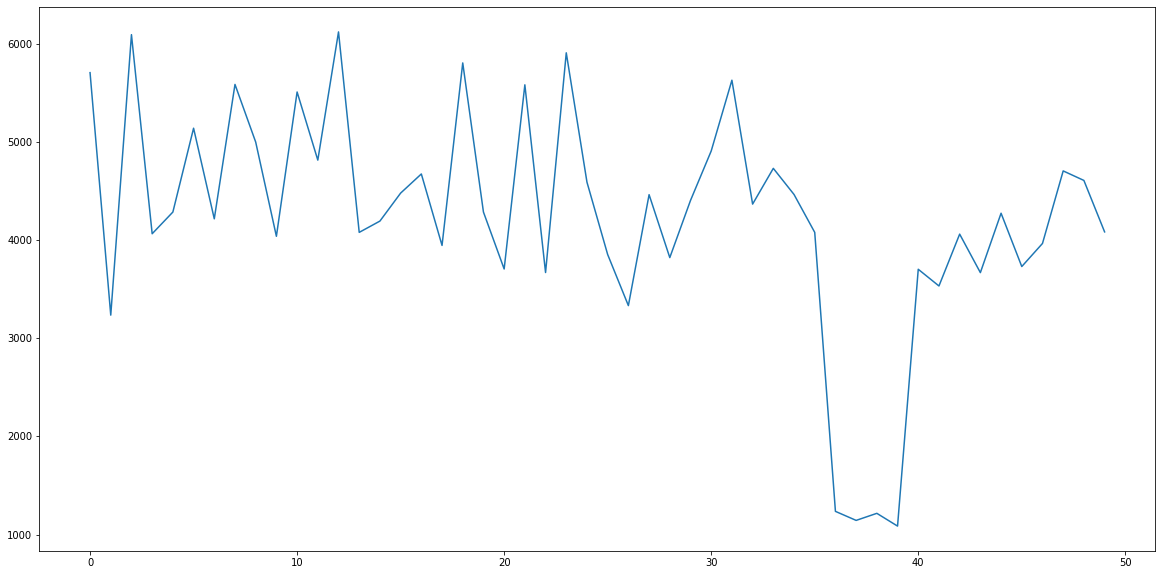

In [48]:
diag_by_symptom_count = diagnoses_symptom_vector_binary.sum(axis=0)
plt.figure(figsize=(20,10))
plt.plot(diag_by_symptom_count.index, diag_by_symptom_count)

In [68]:
diagnosis.head()
diag_count_by_admission.loc[diag_count_by_admission['ICD9_3CHAR'] > 30]


,HADM_ID,ICD9_3CHAR
12,100019,4
9,100016,11
9,100016,11
5,100010,5
14,100021,23
...,...,...
7,100012,10
9,100016,11
9,100016,11
13,100020,17


<h4> Analysis of Diagnosis count by Hospital Admissions</h4>

401    21305
427    17226
276    15101
272    14558
414    14410
       ...  
045        1
V76        1
023        1
390        1
915        1
Name: ICD9_3CHAR, Length: 942, dtype: int64

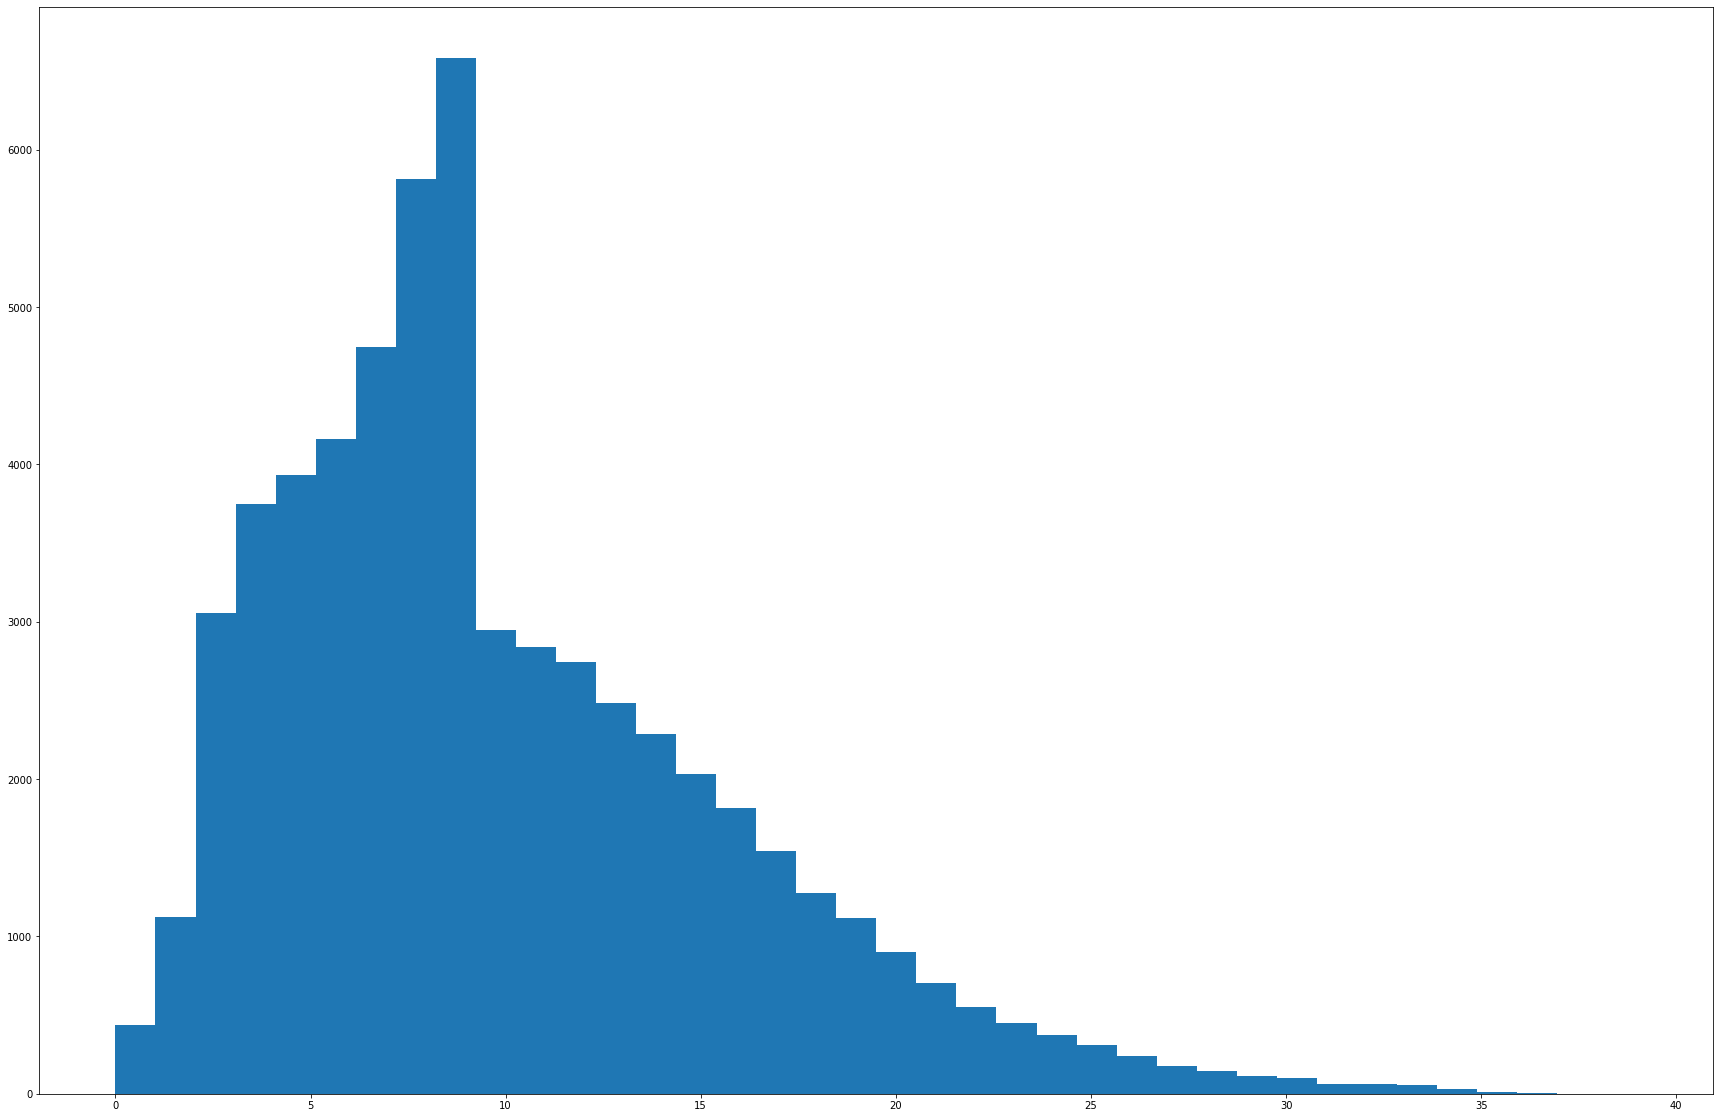

In [80]:
diag_count_by_admission = diagnosis.groupby(['HADM_ID'], as_index=False)['ICD9_3CHAR'].count()
diag_by_adm = diag_count_by_admission.groupby(['ICD9_3CHAR'], as_index=False)['ICD9_3CHAR'].count()
diag_count_by_admission['ICD9_3CHAR']
plt.figure(figsize=(30,20))
plt.hist(diag_count_by_admission['ICD9_3CHAR'][:-1], bins=38)
diagnosis['ICD9_3CHAR'].value_counts()

(array([2.0200e+04, 1.4916e+04, 6.6110e+03, 1.8510e+03, 3.6400e+02,
        5.9000e+01, 2.8000e+01, 9.0000e+00, 4.0000e+00, 4.0000e+00]),
 array([ 1. ,  5.1,  9.2, 13.3, 17.4, 21.5, 25.6, 29.7, 33.8, 37.9, 42. ]),
 <BarContainer object of 10 artists>)

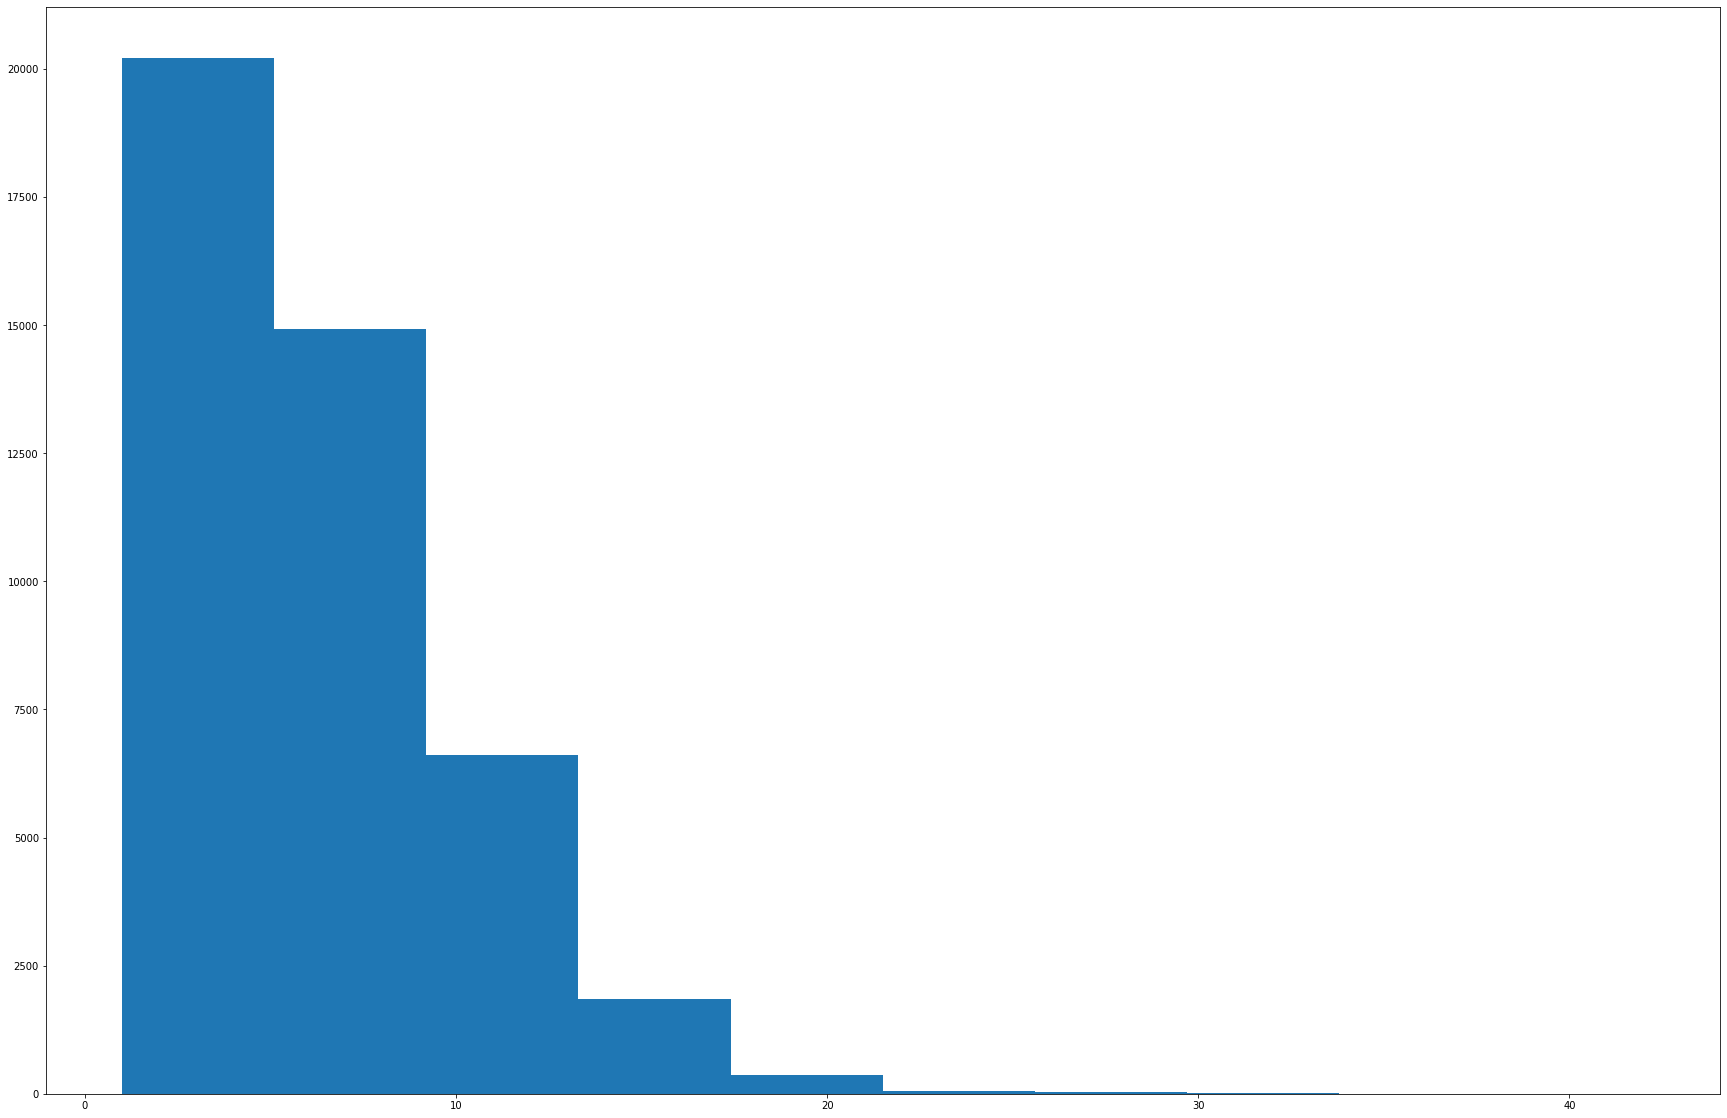

In [77]:
top_N_filtered['ICD9_3CHAR'].value_counts()
top_N_diag_count_by_admission = top_N_filtered.groupby(['HADM_ID'], as_index=False)['ICD9_3CHAR'].count()
plt.figure(figsize=(30,20))
plt.hist(top_N_diag_count_by_admission['ICD9_3CHAR'][:-1])

<h3>Saving all the results to files  </h3>

In [26]:
tag = "_v3"
weight_i_j.to_csv(f"data/weight_i_j{tag}.csv", index=False)
top_N_filtered.to_csv(f"data/top_N_filtered{tag}.csv", index=False)
import json

with open(f"data/filtered_symptom_dict{tag}.csv", 'w') as f:
    json.dump(filtered_symptom_dict, f)

with open(f"data/icd9_dict{tag}.csv", 'w') as f:
    json.dump(icd9_dict, f)